In [1]:
import pandas as pd
import networkx as nx

### Lettura dataset e selezione dei soli giocatori in entrata (evitando così doppi trasferimenti e giocatori svincolati)

In [2]:
df = pd.read_csv('./dataset/dataset/transfers.csv')
dataset = df[df['dir'] == 'in']
dataset

,league,season,window,team_id,team_name,team_country,dir,player_id,player_name,player_age,...,counter_team_id,counter_team_name,counter_team_country,transfer_fee_amnt,market_val_amnt,is_free,is_loan,is_loan_end,is_retired,transfer_id
0,GB1,2009,s,985,Manchester United,England,in,33544,Antonio Valencia,23.0,...,1071,Wigan Athletic,England,18800000.0,NaN,False,False,False,False,310832
1,GB1,2009,s,985,Manchester United,England,in,62049,Mame Diouf,21.0,...,687,Molde FK,Norway,4500000.0,1600000.0,False,False,False,False,319841
2,GB1,2009,s,985,Manchester United,England,in,43261,Gabriel Obertan,20.0,...,40,FC Girondins Bordeaux,France,4000000.0,400000.0,False,False,False,False,315185
3,GB1,2009,s,985,Manchester United,England,in,1397,Michael Owen,29.0,...,762,Newcastle United,England,0.0,NaN,True,False,False,False,306421
4,GB1,2009,s,985,Manchester United,England,in,73538,Scott Moffatt,18.0,...,5242,Manchester United U18,England,NaN,NaN,False,False,False,False,339015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70000,NL1,2021,w,385,Fortuna Sittard,Netherlands,in,140032,Andreas Samaris,32.0,...,515,Without Club,Without Club,NaN,1500000.0,False,False,False,False,3633188
70001,NL1,2021,w,306,SC Heerenveen,Netherlands,in,257808,Runar Espejord,25.0,...,1293,Tromsø IL,Norway,NaN,500000.0,False,True,True,False,3071862
70002,NL1,2021,w,306,SC Heerenveen,Netherlands,in,580142,Joaquín Fernández,22.0,...,37535,Montevideo City Torque,Uruguay,NaN,100000.0,False,True,True,False,3268245
70003,NL1,2021,w,468,Sparta Rotterdam,Netherlands,in,340353,Maduka Okoye,22.0,...,1010,Watford FC,England,NaN,1000000.0,False,True,False,False,3619917


In [3]:
print('colonna player_age Nan -> ' , dataset['player_age'].isna().sum())
print('colonna transfer_fee_amnt Nan -> ' , dataset['transfer_fee_amnt'].isna().sum())
print('colonna market_val_amnt Nan -> ' , dataset['market_val_amnt'].isna().sum())
print('colonna team_name Nan -> ' , dataset['team_name'].isna().sum())
print('colonna counter_team_name Nan -> ' , dataset['counter_team_name'].isna().sum())

colonna player_age Nan ->  6
colonna transfer_fee_amnt Nan ->  18669
colonna market_val_amnt Nan ->  7523
colonna team_name Nan ->  0
colonna counter_team_name Nan ->  0


### Preprocessing:
##### - Rimuoviamo i 6 trasferimenti il cui player_age è Nan (per eventuali analisi future sull'età)
##### - Sostituiamo i Nan di transfer_fee_amnt con 0 (per eventuali analisi future sui valori di trasferimento)
##### - Sostituiamo i Nan di market_val_amnt con 0 (per eventuali analisi future sui valori di mercato)
##### - Seleziono solo i trasferimenti in cui la colonna 'counter_team_name' è diversa da 'Without Club' in quanto questa indica giocatori svincolati
##### - Seleziono solo i trasferimenti in cui la colonna 'team_name' è diversa da 'Without Club' in quanto questa indica l'ingaggio di giocatori svincolati


In [4]:
# rimuovi i 6 player che non hanno età
dataset.dropna(subset=['player_age'], inplace=True)
# sostituisci i valori di trasferimento Nan con 0
dataset['transfer_fee_amnt'].fillna(0, inplace=True)
# sostituisci i valori di valore di mercato Nan con 0
dataset['market_val_amnt'].fillna(0, inplace=True)
# rimuovi i trasferimenti senza squadra di destinazione (ovvero svincoli)
dataset = dataset[dataset['counter_team_name'] != 'Without Club'] 
# rimuovi i trasferimenti senza squadra di provenienza (ovvero ingaggio di svincolati)
dataset = dataset[dataset['team_name'] != 'Without Club']
print('Il dataset è composto da ', dataset.shape[0], ' trasferimenti')

Il dataset è composto da  31416  trasferimenti


/var/folders/61/9rphml817c1d45n8g26p1ltm0000gn/T/ipykernel_937/2582955158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.dropna(subset=['player_age'], inplace=True)
/var/folders/61/9rphml817c1d45n8g26p1ltm0000gn/T/ipykernel_937/2582955158.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['transfer_fee_amnt'].fillna(0, inplace=True)
/var/folders/61/9rphml817c1d45n8g26p1ltm0000gn/T/ipykernel_937/2582955158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

### Inizio costruzione della rete
#### Ogni team deve avere:
##### - un id
##### - un nome
##### - un paese e un codice lega (GB1 ad esempio)
### I team devono essere presi sia da team_name che da counter_team_name
#### Ogni trasferimento deve avere: 
##### - un id di trasferimento (?)
##### - un player id 
##### - un player name
##### - l'età del player
##### - una season
##### - una finestra di mercato (invernale o estiva)
##### - un valore di trasferimento
##### - un bool che indica se è in prestito o a titolo definitivo
##### - il valore di mercato (?)

In [23]:
# Crea un grafo diretto
G = nx.DiGraph()

# Seleziona le squadre che acquistano il giocatore  
teams_in = dataset[['team_id', 'team_name', 'team_country']]

# Seleziona le squadre che vendono il giocatore
teams_out = dataset[['counter_team_id', 'counter_team_name', 'counter_team_country']]
teams_out = teams_out.rename(columns={'counter_team_id': 'team_id'})
teams_out = teams_out.rename(columns={'counter_team_name': 'team_name'})
teams_out = teams_out.rename(columns={'counter_team_country': 'team_country'})

# Concatena i DataFrame in un unico DataFrame
teams = pd.concat([teams_in, teams_out])

# Rimuovi le righe duplicate
teams = teams.drop_duplicates()

for index, row in teams.iterrows():
    # il primo è l'identficativo del nodo, il secondo è una label che etichetta il tipo di nodo, gli altri sono attributi
    G.add_node(row['team_id'], label='team', name=row['team_name'], country=row['team_country'])


# Aggiungi gli archi che rappresentano i trasferimenti tra squadre 
for index, row in dataset.iterrows():
    transfer_attributes = {
        'transfer_id': row['transfer_id'],
        'player_id': row['player_id'],
        'player_name': row['player_name'],
        'player_age': row['player_age'],
        'season': row['season'],
        'window': row['window'],
        'transfer_fee': row['transfer_fee_amnt'],
        'is_loan': row['is_loan'],
        'market_value': row['market_val_amnt']
    }

    # Aggiungi gli archi che rappresentano i trasferimenti tra squadre (essendo solo trasferimenti in ingresso si aggiungono solo archi da squadra venditrice (counter_team) a squadra (team))
    G.add_edge(row['counter_team_id'], row['team_id'],  # Inverti l'ordine dei nodi
               label='transfer',
               **transfer_attributes)  # Aggiungi gli attributi del trasferimento

In [26]:
print('Nodi -> ', G.number_of_nodes())
print('Archi -> ', G.number_of_edges())
print('Density -> ', nx.density(G))

Nodi ->  2726
Archi ->  17352
Density ->  0.0023359157821050435


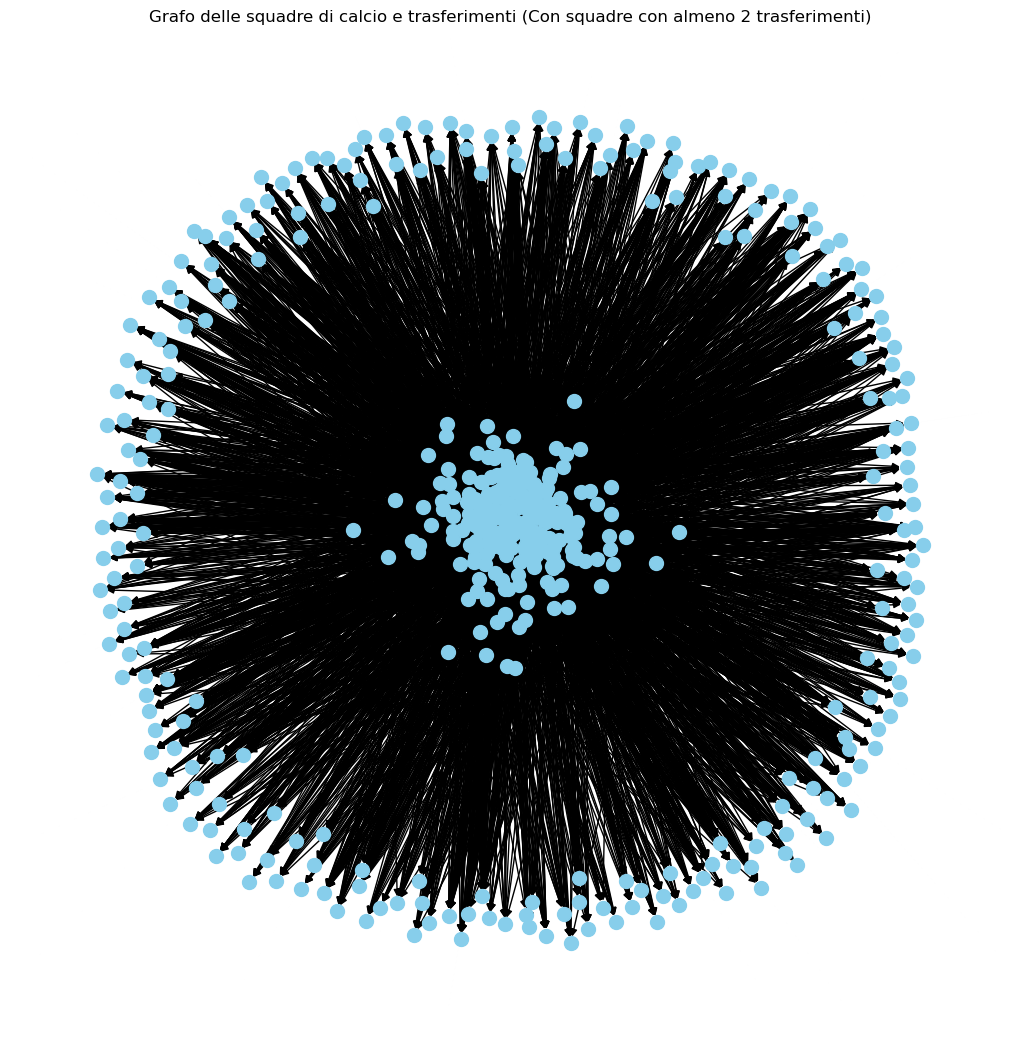

In [60]:
degree = dict(filtered_G.degree())

# Trova le prime 10 squadre con il grado massimo
top_10_teams = pd.Series(degree).nlargest(10)

# Stampa le prime 10 squadre e i loro gradi
print("Top 10 squadre con il grado massimo:")
for team, degree_value in top_10_teams.items():
    print(f"{team}: {degree_value} trasferimenti")

Top 10 squadre con il grado massimo:
Sporting CP: 241 trasferimenti
Chelsea FC: 241 trasferimenti
SL Benfica: 233 trasferimenti
FC Porto: 224 trasferimenti
Manchester City: 210 trasferimenti
AS Monaco: 200 trasferimenti
Sevilla FC: 199 trasferimenti
Arsenal FC: 183 trasferimenti
Genoa CFC: 173 trasferimenti
Liverpool FC: 172 trasferimenti


In [61]:
# Calcola il grado in ingresso (acquisti) e il grado in uscita (vendite) per ciascuna squadra
in_degree = dict(filtered_G.in_degree())
out_degree = dict(filtered_G.out_degree())

# Trova le prime 10 squadre con il grado massimo in ingresso (acquisti)
top_10_purchasing_teams = sorted(in_degree, key=in_degree.get, reverse=True)[:10]

# Trova le prime 10 squadre con il grado massimo in uscita (vendite)
top_10_selling_teams = sorted(out_degree, key=out_degree.get, reverse=True)[:10]

print("Top 10 squadre con il grado massimo in ingresso (acquisti):")
for team in top_10_purchasing_teams:
    print(f"{team}: {in_degree[team]} giocatori acquistati")

print("\nTop 10 squadre con il grado massimo in uscita (vendite):")
for team in top_10_selling_teams:
    print(f"{team}: {out_degree[team]} giocatori venduti")

Top 10 squadre con il grado massimo in ingresso (acquisti):
Chelsea FC: 93 giocatori acquistati
Sporting CP: 86 giocatori acquistati
FC Porto: 86 giocatori acquistati
Manchester City: 84 giocatori acquistati
SL Benfica: 82 giocatori acquistati
AS Monaco: 78 giocatori acquistati
Sevilla FC: 76 giocatori acquistati
Atlético de Madrid: 75 giocatori acquistati
AS Roma: 74 giocatori acquistati
Juventus FC: 72 giocatori acquistati

Top 10 squadre con il grado massimo in uscita (vendite):
Sporting CP: 155 giocatori venduti
SL Benfica: 151 giocatori venduti
Chelsea FC: 148 giocatori venduti
FC Porto: 138 giocatori venduti
Manchester City: 126 giocatori venduti
Sevilla FC: 123 giocatori venduti
AS Monaco: 122 giocatori venduti
Arsenal FC: 118 giocatori venduti
Liverpool FC: 112 giocatori venduti
West Ham United: 112 giocatori venduti


In [62]:
# Calcola la spesa totale per ciascuna squadra sommando i costi degli archi in uscita
total_spending_by_team = {team: sum(attr['transfer_fee_amnt'] for _, _, attr in filtered_G.out_edges(team, data=True)) for team in filtered_G.nodes()}

# Trova la squadra che ha speso di più e quella che ha speso di meno
team_with_highest_spending = max(total_spending_by_team, key=total_spending_by_team.get)
team_with_lowest_spending = min(total_spending_by_team, key=total_spending_by_team.get)

highest_spending_amount = total_spending_by_team[team_with_highest_spending]
lowest_spending_amount = total_spending_by_team[team_with_lowest_spending]

print(f"Squadra che ha speso di più ({highest_spending_amount} euro spesi): {team_with_highest_spending}")
print(f"Squadra che ha speso di meno ({lowest_spending_amount} euro spesi): {team_with_lowest_spending}")

Squadra che ha speso di più (1013685000.0 euro spesi): Manchester City
Squadra che ha speso di meno (0.0 euro spesi): Leixões SC


In [64]:
# Crea una copia modificabile del grafo
modifiable_G = filtered_G.copy()

# Calcola il grado in ingresso (numero di giocatori acquistati) per ciascuna squadra
in_degree = dict(modifiable_G.in_degree())

# Identifica i club che hanno solo venduto giocatori (grado in ingresso uguale a zero)
clubs_to_remove = [team for team, degree in in_degree.items() if degree == 0]

# Rimuovi i club identificati dal grafo modificabile
modifiable_G.remove_nodes_from(clubs_to_remove)

In [65]:
# Calcola la spesa totale per ciascuna squadra sommando i costi degli archi in uscita
total_spending_by_team = {team: sum(attr['transfer_fee_amnt'] for _, _, attr in modifiable_G.out_edges(team, data=True)) for team in modifiable_G.nodes()}

# Trova la squadra che ha speso di più e quella che ha speso di meno
team_with_highest_spending = max(total_spending_by_team, key=total_spending_by_team.get)
team_with_lowest_spending = min(total_spending_by_team, key=total_spending_by_team.get)

highest_spending_amount = total_spending_by_team[team_with_highest_spending]
lowest_spending_amount = total_spending_by_team[team_with_lowest_spending]

print(f"Squadra che ha speso di più ({highest_spending_amount} euro spesi): {team_with_highest_spending}")
print(f"Squadra che ha speso di meno ({lowest_spending_amount} euro spesi): {team_with_lowest_spending}")

Squadra che ha speso di più (1013685000.0 euro spesi): Manchester City
Squadra che ha speso di meno (0.0 euro spesi): Leixões SC


In [66]:
# Calcola l'incasso totale per ciascuna squadra sommando i costi degli archi in ingresso
total_income_by_team = {team: sum(attr['transfer_fee_amnt'] for _, _, attr in modifiable_G.in_edges(team, data=True)) for team in modifiable_G.nodes()}

# Trova la squadra che ha incassato di più e quella che ha incassato di meno
team_with_highest_income = max(total_income_by_team, key=total_income_by_team.get)
team_with_lowest_income = min(total_income_by_team, key=total_income_by_team.get)

highest_income_amount = total_income_by_team[team_with_highest_income]
lowest_income_amount = total_income_by_team[team_with_lowest_income]

print(f"Squadra che ha incassato di più ({highest_income_amount} euro incassati): {team_with_highest_income}")
print(f"Squadra che ha incassato di meno ({lowest_income_amount} euro incassati): {team_with_lowest_income}")


Squadra che ha incassato di più (535230000.0 euro incassati): Parma FC
Squadra che ha incassato di meno (0.0 euro incassati): GD Chaves


In [67]:
# Identifica i nodi che soddisfano il criterio (transfer_fee_amnt uguale a 0 per tutti gli archi uscenti e entranti)
nodes_to_remove = []
for node in modifiable_G.nodes():
    out_edges = modifiable_G.out_edges(node, data=True)
    in_edges = modifiable_G.in_edges(node, data=True)
    
    if all(attr['transfer_fee_amnt'] == 0 for _, _, attr in out_edges) and all(attr['transfer_fee_amnt'] == 0 for _, _, attr in in_edges):
        nodes_to_remove.append(node)

# Rimuovi i nodi identificati dal grafo
modifiable_G.remove_nodes_from(nodes_to_remove)

In [72]:
# Calcola la spesa totale per ciascuna squadra sommando i costi degli archi in uscita
total_spending_by_team = {team: sum(attr['transfer_fee_amnt'] for _, _, attr in modifiable_G.out_edges(team, data=True)) for team in modifiable_G.nodes()}

# Trova il massimo e il minimo importo speso
max_spending = max(total_spending_by_team.values())
min_spending = min(total_spending_by_team.values())

# Trova tutte le squadre con l'importo massimo
teams_with_highest_spending = [team for team, spending in total_spending_by_team.items() if spending == max_spending]

# Trova tutte le squadre con l'importo minimo
teams_with_lowest_spending = [team for team, spending in total_spending_by_team.items() if spending == min_spending]

print(f"Squadre che hanno speso di più ({max_spending} euro spesi):")
for team in teams_with_highest_spending:
    print(f"{team}: {total_spending_by_team[team]} euro spesi")

print(f"Squadre che hanno speso di meno ({min_spending} euro spesi):")
for team in teams_with_lowest_spending:
    print(f"{team}: {total_spending_by_team[team]} euro spesi")


Squadre che hanno speso di più (1013685000.0 euro spesi):
Manchester City: 1013685000.0 euro spesi
Squadre che hanno speso di meno (0.0 euro spesi):
Leixões SC: 0.0 euro spesi
Coventry City: 0 euro spesi
FC Bayern Munich II: 0 euro spesi
Aalborg BK: 0 euro spesi
KV Kortrijk: 0 euro spesi
Clube Atlético Mineiro: 0 euro spesi
Carpi FC 1909: 0.0 euro spesi
FC Zürich: 0 euro spesi
HNK Rijeka: 0 euro spesi
Red Star FC: 0 euro spesi
Club Atlético Rosario Central: 0 euro spesi
Kasimpasa: 0 euro spesi
Spartak Moscow: 0 euro spesi
FC Basel 1893: 0 euro spesi
FC Porto B: 0 euro spesi
AC Sparta Prague: 0 euro spesi
Wycombe Wanderers: 0 euro spesi
Videoton FC: 0 euro spesi
LB Châteauroux: 0 euro spesi
Hapoel Tel Aviv: 0 euro spesi
FK Vojvodina Novi Sad: 0 euro spesi
Goiás Esporte Clube: 0 euro spesi
Grasshopper Club Zurich: 0 euro spesi
Real Madrid Castilla: 0 euro spesi
Le Mans FC: 0 euro spesi
Botafogo de Futebol e Regatas: 0 euro spesi
Nottingham Forest: 0 euro spesi
Sport Club Internacional: 0

In [71]:
# Calcola l'incasso totale per ciascuna squadra sommando i costi degli archi in ingresso
total_income_by_team = {team: sum(attr['transfer_fee_amnt'] for _, _, attr in modifiable_G.in_edges(team, data=True)) for team in modifiable_G.nodes()}

# Trova il massimo e il minimo importo incassato
max_income = max(total_income_by_team.values())
min_income = min(total_income_by_team.values())

# Trova tutte le squadre con l'importo massimo
teams_with_highest_income = [team for team, income in total_income_by_team.items() if income == max_income]

# Trova tutte le squadre con l'importo minimo
teams_with_lowest_income = [team for team, income in total_income_by_team.items() if income == min_income]

print(f"Squadre che hanno incassato di più ({max_income} euro incassati):")
for team in teams_with_highest_income:
    print(f"{team}: {total_income_by_team[team]} euro incassati")

print(f"Squadre che hanno incassato di meno ({min_income} euro incassati):")
for team in teams_with_lowest_income:
    print(f"{team}: {total_income_by_team[team]} euro incassati")


Squadre che hanno incassato di più (535230000.0 euro incassati):
Parma FC: 535230000.0 euro incassati
Squadre che hanno incassato di meno (0.0 euro incassati):
GD Chaves: 0.0 euro incassati
Xerez CD: 0.0 euro incassati


# Rimuovi i nodi che non hanno sia un arco pagato in ingresso che un arco pagato in uscita

In [81]:
nodes_to_keep = []
for node in modifiable_G.nodes():
    out_edges = modifiable_G.out_edges(node, data=True)
    in_edges = modifiable_G.in_edges(node, data=True)
    
    # Verifica se c'è almeno un arco uscente con transfer_fee_amnt diverso da 0 e almeno un arco entrante con transfer_fee_amnt diverso da 0
    if any(attr['transfer_fee_amnt'] != 0.0 for _, _, attr in out_edges) and any(attr['transfer_fee_amnt'] != 0.0 for _, _, attr in in_edges):
        nodes_to_keep.append(node)

# Rimuovi i nodi che non soddisfano il criterio dal grafo
modifiable_G.remove_nodes_from([node for node in modifiable_G.nodes() if node not in nodes_to_keep])

In [82]:
# Calcola la spesa totale per ciascuna squadra sommando i costi degli archi in uscita
total_spending_by_team = {team: sum(attr['transfer_fee_amnt'] for _, _, attr in modifiable_G.out_edges(team, data=True)) for team in modifiable_G.nodes()}

# Trova il massimo e il minimo importo speso
max_spending = max(total_spending_by_team.values())
min_spending = min(total_spending_by_team.values())

# Trova tutte le squadre con l'importo massimo
teams_with_highest_spending = [team for team, spending in total_spending_by_team.items() if spending == max_spending]

# Trova tutte le squadre con l'importo minimo
teams_with_lowest_spending = [team for team, spending in total_spending_by_team.items() if spending == min_spending]

print(f"Squadre che hanno speso di più ({max_spending} euro spesi):")
for team in teams_with_highest_spending:
    print(f"{team}: {total_spending_by_team[team]} euro spesi")

print(f"Squadre che hanno speso di meno ({min_spending} euro spesi):")
for team in teams_with_lowest_spending:
    print(f"{team}: {total_spending_by_team[team]} euro spesi")


Squadre che hanno speso di più (942810000.0 euro spesi):
Manchester City: 942810000.0 euro spesi
Squadre che hanno speso di meno (50000.0 euro spesi):
FC St. Pauli: 50000.0 euro spesi


In [83]:
# Calcola l'incasso totale per ciascuna squadra sommando i costi degli archi in ingresso
total_income_by_team = {team: sum(attr['transfer_fee_amnt'] for _, _, attr in modifiable_G.in_edges(team, data=True)) for team in modifiable_G.nodes()}

# Trova il massimo e il minimo importo incassato
max_income = max(total_income_by_team.values())
min_income = min(total_income_by_team.values())

# Trova tutte le squadre con l'importo massimo
teams_with_highest_income = [team for team, income in total_income_by_team.items() if income == max_income]

# Trova tutte le squadre con l'importo minimo
teams_with_lowest_income = [team for team, income in total_income_by_team.items() if income == min_income]

print(f"Squadre che hanno incassato di più ({max_income} euro incassati):")
for team in teams_with_highest_income:
    print(f"{team}: {total_income_by_team[team]} euro incassati")

print(f"Squadre che hanno incassato di meno ({min_income} euro incassati):")
for team in teams_with_lowest_income:
    print(f"{team}: {total_income_by_team[team]} euro incassati")


Squadre che hanno incassato di più (535230000.0 euro incassati):
Parma FC: 535230000.0 euro incassati
Squadre che hanno incassato di meno (300000.0 euro incassati):
Belenenses SAD: 300000.0 euro incassati


In [84]:
print(modifiable_G.number_of_nodes())
print(modifiable_G.number_of_edges())

204
7050


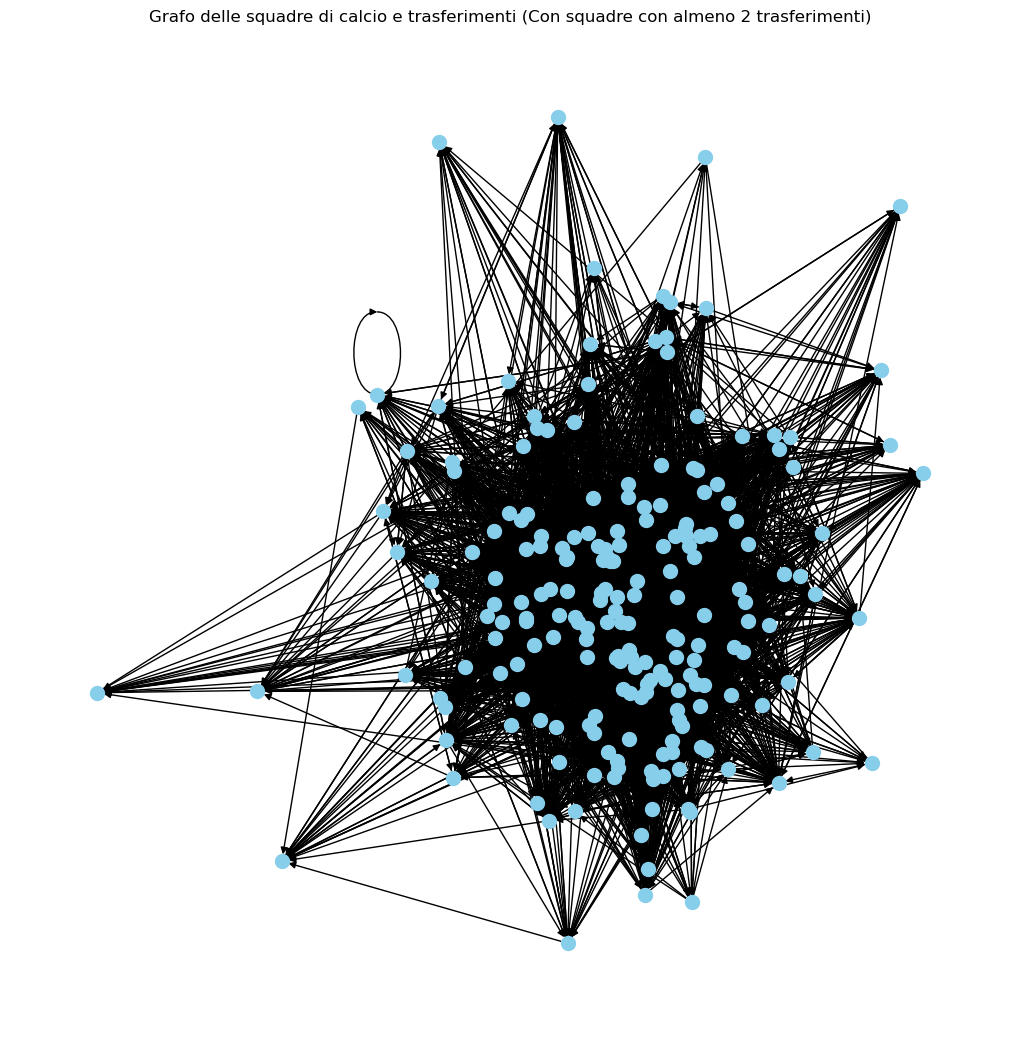

In [85]:
# Visualizza il grafico
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(filtered_G)  # Utilizza il layout spring_layout
nx.draw(modifiable_G, pos, with_labels=False, node_size=100, node_color='skyblue', font_size=8)
plt.title("Grafo delle squadre di calcio e trasferimenti (Con squadre con almeno 2 trasferimenti)")
plt.show()

In [87]:
print(nx.density(modifiable_G))

0.1702405099971023
